# Visualization of Centuries of Kohli

This project is about Analysizing the centuries of Kohli and compared them against different parameters like opposing team’s country, strike rate,win/loss/draw, batting order, home and away-ground conditions, stadium. Analysiation is done by using the python libraries like Matplotlib,Seaborn,Numpy,Pandas.This Analysis gives the complete picture of virat kohli performance

In [165]:
# importing requried packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import missingno as msno
import plotly.express as px
import matplotlib as mpl
import plotly.io as pio

In [166]:
# importing and setting plot features 
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

### Reading the csv file 

In [167]:
df = pd.read_csv(r"C:\Users\Madhuri\Downloads\Centuries of Virat Kohli.csv")
df.head()

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Venue,Column1,Contry,H/A,Date,Result,Format,Man of the Match,Captain,Unnamed: 15
0,116,Out,Australia,6,2,NaN,Adelaide Oval,Adelaide,AUS,Away,24-01-2012,Lost,Test,No,No,NaN
1,103,Out,New Zealand,5,2,NaN,M. Chinnaswamy Stadium,Bangalore,IND,Home,31-08-2012,Won,Test,Yes,No,NaN
2,103,Out,England,5,2,NaN,Vidarbha Cricket Association Stadium,Nagpur,IND,Home,13-12-2012,Drawn,Test,No,No,NaN
3,107,Out,Australia,5,2,NaN,M. A. Chidambaram Stadium,Chennai,IND,Home,22-02-2013,Won,Test,No,No,NaN
4,119,Out,South Africa,4,1,NaN,Wanderers Stadium,Johannesburg,ZAF,Away,18-12-2013,Drawn,Test,No,No,NaN


### Data Preparation and Cleaning

In [168]:
df.shape

(71, 16)

In [169]:
df.columns

Index(['Score', 'Out/Not Out', 'Against', 'Batting Order', 'Inn.',
       'Strike Rate', 'Venue', 'Column1', 'Contry', 'H/A', 'Date', 'Result',
       'Format', 'Man of the Match', 'Captain', 'Unnamed: 15'],
      dtype='object')

In [170]:
# changing the columns names
df.columns = ['Score', 'Out/Not Out', 'Against', 'Batting Order', 'Inn.',
       'Strike Rate', 'Stadium','Place','Country','H/A', 'Date', 'Result', 'Format',
       'Man of the Match', 'Captain', 'Unnamed: 14']
df.head()

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Stadium,Place,Country,H/A,Date,Result,Format,Man of the Match,Captain,Unnamed: 14
0,116,Out,Australia,6,2,NaN,Adelaide Oval,Adelaide,AUS,Away,24-01-2012,Lost,Test,No,No,NaN
1,103,Out,New Zealand,5,2,NaN,M. Chinnaswamy Stadium,Bangalore,IND,Home,31-08-2012,Won,Test,Yes,No,NaN
2,103,Out,England,5,2,NaN,Vidarbha Cricket Association Stadium,Nagpur,IND,Home,13-12-2012,Drawn,Test,No,No,NaN
3,107,Out,Australia,5,2,NaN,M. A. Chidambaram Stadium,Chennai,IND,Home,22-02-2013,Won,Test,No,No,NaN
4,119,Out,South Africa,4,1,NaN,Wanderers Stadium,Johannesburg,ZAF,Away,18-12-2013,Drawn,Test,No,No,NaN


Text(0.5, 1.0, 'Missing Values Table')

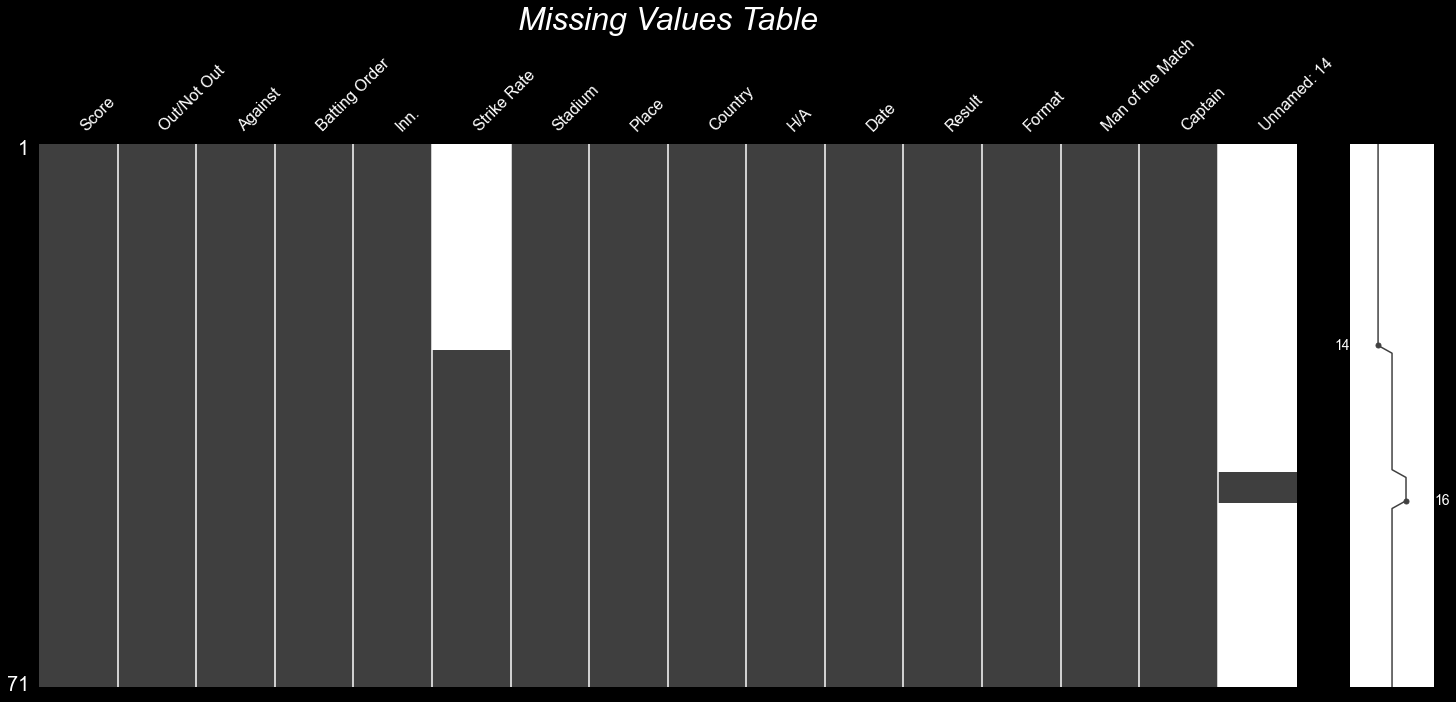

In [171]:
# Plot to find missing data 
msno.matrix(df)
plt.title('Missing Values Table',fontsize=32, fontstyle= 'oblique')

In [172]:
df.isnull().sum()

Score                0
Out/Not Out          0
Against              0
Batting Order        0
Inn.                 0
Strike Rate         27
Stadium              0
Place                0
Country              0
H/A                  0
Date                 0
Result               0
Format               0
Man of the Match     0
Captain              0
Unnamed: 14         67
dtype: int64

#### Dealing with missing data

In [173]:
df.drop('Unnamed: 14',axis=1,inplace=True)

In [174]:
df.groupby('Format').mean()

,Score,Batting Order,Inn.,Strike Rate
Format,,,,
ODI,120.813953,3.162791,1.604651,112.02
T20I,122.000000,1.000000,1.000000,200.00
Test,150.555556,4.185185,1.962963,NaN


In test maches strike is not important so fill zero in place of missing data

In [175]:
df['Strike Rate'] = df['Strike Rate'].fillna(0)

In [176]:
df.isnull().sum()

Score               0
Out/Not Out         0
Against             0
Batting Order       0
Inn.                0
Strike Rate         0
Stadium             0
Place               0
Country             0
H/A                 0
Date                0
Result              0
Format              0
Man of the Match    0
Captain             0
dtype: int64

In [177]:
# checking any duplicate are there 
df.duplicated().unique()

array([False])

In [178]:
# Formating the date
df['Date'] =  pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [179]:
df.head()

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Stadium,Place,Country,H/A,Date,Result,Format,Man of the Match,Captain
0,116,Out,Australia,6,2,0.0,Adelaide Oval,Adelaide,AUS,Away,2012-01-24,Lost,Test,No,No
1,103,Out,New Zealand,5,2,0.0,M. Chinnaswamy Stadium,Bangalore,IND,Home,2012-08-31,Won,Test,Yes,No
2,103,Out,England,5,2,0.0,Vidarbha Cricket Association Stadium,Nagpur,IND,Home,2012-12-13,Drawn,Test,No,No
3,107,Out,Australia,5,2,0.0,M. A. Chidambaram Stadium,Chennai,IND,Home,2013-02-22,Won,Test,No,No
4,119,Out,South Africa,4,1,0.0,Wanderers Stadium,Johannesburg,ZAF,Away,2013-12-18,Drawn,Test,No,No


In [180]:
df['Format'].unique()

array(['Test', 'ODI', 'T20I'], dtype=object)

In [181]:
df[df['Format']!='Test'][['Score','Strike Rate']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Score,44.0,120.840909,17.743578,100.0,107.0000,116.500,128.2500,183.0
Strike Rate,44.0,114.019545,25.257567,84.9,96.6325,108.935,120.7875,200.0


In [182]:
df[df['Format']=='Test']['Score'].describe()

count     27.000000
mean     150.555556
std       48.817031
min      103.000000
25%      106.000000
50%      139.000000
75%      184.500000
max      254.000000
Name: Score, dtype: float64

In [183]:
df['Date'].duplicated().unique()

array([False,  True])

In [184]:
df['Date'].value_counts()

2014-12-09    2
2012-01-24    1
2014-10-17    1
2016-10-23    1
2016-01-20    1
             ..
2011-02-19    1
2011-09-16    1
2011-10-17    1
2011-12-02    1
2022-09-08    1
Name: Date, Length: 70, dtype: int64

##### Observation 
On 2014-12-09 he score two Centuries 

In [185]:
df[df['Date']=='2014-12-09']

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Stadium,Place,Country,H/A,Date,Result,Format,Man of the Match,Captain
6,115,Out,Australia,4,2,0.0,Adelaide Oval,Adelaide,AUS,Away,2014-12-09,Lost,Test,No,Yes
7,141,Out,Australia,4,4,0.0,Adelaide Oval,Adelaide,AUS,Away,2014-12-09,Lost,Test,No,Yes


At Adelaide Oval stadium in 2014 against Australia in test match Virat had scored 2 Centuries on Same date i.e. 09th Dec 2014 where he was leading the team but lost the match.

### Exploratory Analysis and Visualization

In [186]:
df['Format_century_no'] = df.groupby(['Format'])['Date'].rank(method='max').astype(int)

In [187]:
df[df.Format_century_no ==1].iloc[:,0:-1]

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Stadium,Place,Country,H/A,Date,Result,Format,Man of the Match,Captain
0,116,Out,Australia,6,2,0.00,Adelaide Oval,Adelaide,AUS,Away,2012-01-24,Lost,Test,No,No
27,107,Out,Sri Lanka,4,2,93.85,Eden Gardens,Kolkata,IND,Home,2009-12-24,Won,ODI,No,No
70,122,Not Out,Afganistan,1,1,200.00,Dubai International Cricket Stadium,Dubai,AE,Away,2022-09-08,Won,T20I,Yes,No


#### Virat Kohli's First Century in each Format :

Test : on 24 jan 2012 against australia he sorced his first test century and scored 116 (Out) at Adelaide Oval,Australia and India Lost this Match while chasing Kohli was batting at number 6.

ODI : on 24th Dec 2009 against srilanka he scored his first odi century and scored 107 at strike rate 93.85 (Out) at Eden Garden,Kolkata,India and India won the Match while chasing Kohli was batting at number 4.

T20I : on 08th Sep 2022 against Afghanistan he scored his first T20 century and scored 122 at strike rate 200.00 (Notout) at Dubai International Stadium,Dubai and India Won this match while defending,Kohli was opener and Virat was awarded with Man of the Match.

In [188]:
df[(df.Format_century_no ==43)|(df.Format_century_no ==27)|(df.Format_century_no ==1)].iloc[:,:-1].sort_values(by='Date').tail(3)

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Stadium,Place,Country,H/A,Date,Result,Format,Man of the Match,Captain
69,114,Not Out,West Indies,3,2,115.15,Queen's Park Oval,Port of Spain,TTO,Away,2019-08-14,Won,ODI,Yes,Yes
26,136,Out,Bangladesh,4,2,0.00,Eden Gardens,Kolkata,IND,Home,2019-11-22,Won,Test,No,Yes
70,122,Not Out,Afganistan,1,1,200.00,Dubai International Cricket Stadium,Dubai,AE,Away,2022-09-08,Won,T20I,Yes,No


#### Virat Kohli's latest Century in each Format :

Test : on 24 jan 2012 against Bangladesh he sorced 136 (Out) at Eden Garden,Kolkata,India and India won the Match while chasing,Virat batted at number 4 and Kohli was leading India.

ODI : on 14th Aug 2019 against West Indies he sorced 114 at strike rate 115.15 (Notout) at Queen's Park Oval,Port of Spain and India won the Match while chasing,Virat batted at number 3,Virat was leading the team and was also awarded with Man of the Match.

T20I : on 08th Sep 2022 against Afghanistan he scored his first T20 century and scored 122 at strike rate 200.00 at Dubai International Stadium,Dubai and India Won this match while defending,Kohli was opener and Virat was awarded with Man of the Match

#### Virat's International Hundreds over the Years years(2010-2022)

In [189]:
# We will give rank for centuries according to the date
df = df.sort_values(by=['Date'])

In [190]:
l = []
for i in range(1,72):
    l.append(i)

In [191]:
df['Int_Century_count'] = l

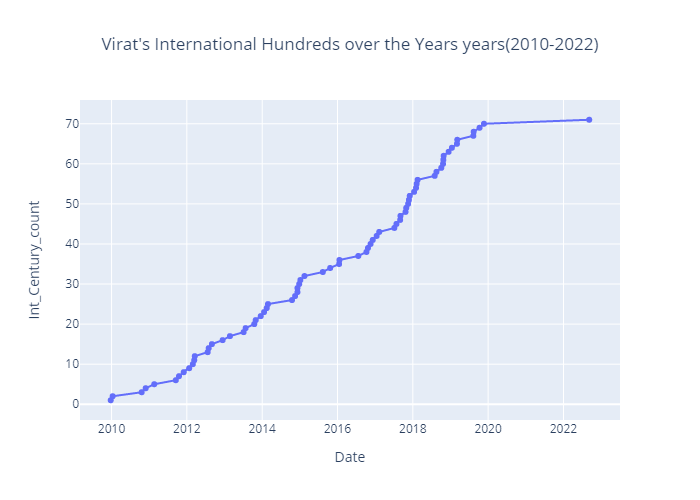

In [214]:
fig1 = px.line(data_frame=df,x='Date',y='Int_Century_count',markers=True,title="Virat's International Hundreds over the Years years(2010-2022)")
fig1.update_layout(title_x=0.5)
pio.renderers.default = "notebook_connected"
fig1.show("png")

#### Virat's International Hundreds over the Years years(2010-2022) wrt Format

In [194]:
centuries_by_year = df.groupby([df['Date'].apply(lambda x: x.year),'Format'])['Score'].count().reset_index().rename(columns={'Score':'Number_of_Centuries'})

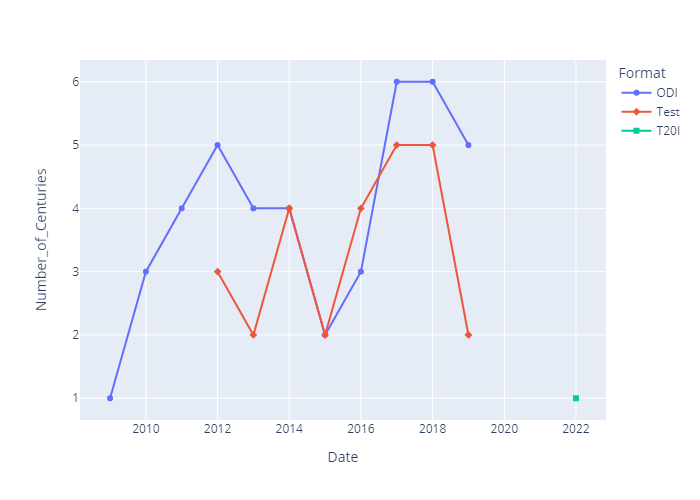

In [216]:
fig = px.line(data_frame=centuries_by_year,x='Date',y='Number_of_Centuries',color='Format',markers=True,symbol='Format')
pio.renderers.default = "notebook_connected"
fig.show("png")

#### Virat's Centuries Strike rate over the Years years(2010-2022) wrt Format except Test matches

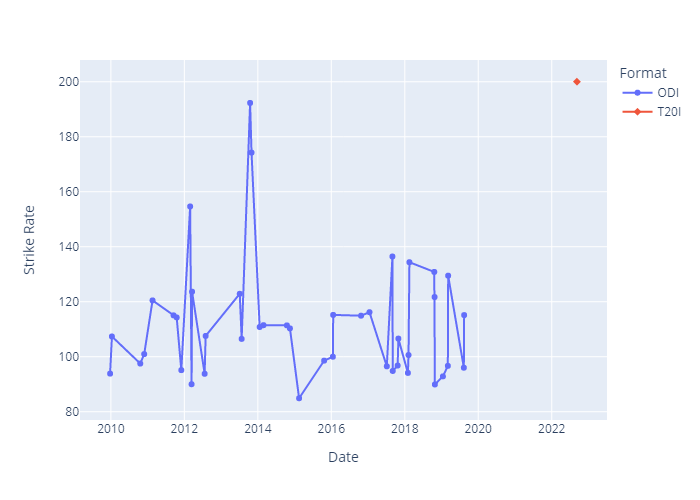

In [218]:
Format_filter = df[(df['Format'] =='Test')].index
data1= df.drop(Format_filter , inplace=False)
fig = px.line(data_frame=data1,x='Date',y='Strike Rate',color='Format',markers=True,symbol='Format')
pio.renderers.default = "notebook_connected"
fig.show("png")

#### Centuries in different countries with numbers 

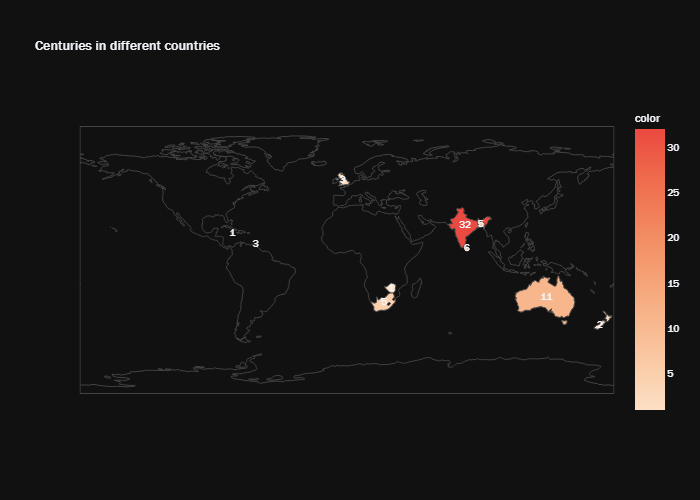

In [219]:
Country = df['Country'].value_counts()
fig = px.choropleth(locations=Country.index,
                    color=Country.values,
                    color_continuous_scale=px.colors.sequential.Peach,
                    template='plotly_dark',
                    title = 'Centuries in different countries')
fig.add_scattergeo(
    locations=Country.index,
    text= Country.values, 
    mode='text')
fig.update_layout(font = dict(size= 10, family="Franklin Gothic"))
pio.renderers.default = "notebook_connected"
fig.show("png")

#### TOP 10 MOST CENTURIES IN STADIUM

In [198]:
df['Stadium'].value_counts().head(10)

Adelaide Oval                              5
Sher-e-Bangla Cricket Stadium              4
Eden Gardens                               3
Queen's Park Oval                          3
Maharashtra Cricket Association Stadium    3
R. Premadasa Stadium                       3
Vidarbha Cricket Association Stadium       3
SuperSport Park                            2
Wankhede Stadium                           2
ACA-VDCA Cricket Stadium                   2
Name: Stadium, dtype: int64

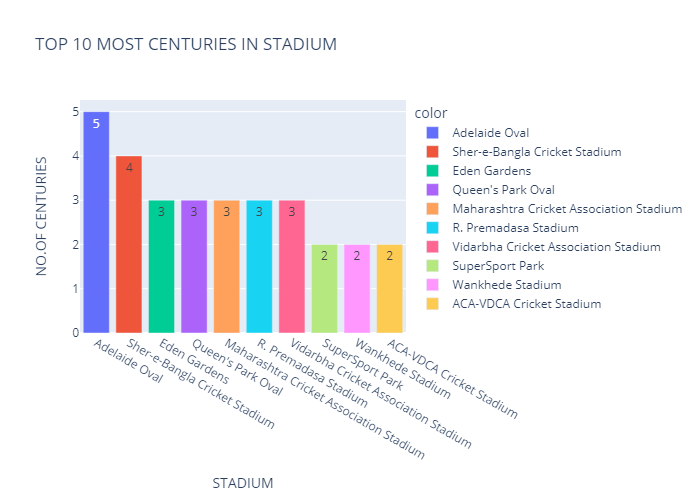

<Figure size 5400x5400 with 0 Axes>

In [220]:
plt.figure(dpi=300,figsize=(18,18))
fig=px.bar(x=df['Stadium'].value_counts().head(10).index,
       y=df['Stadium'].value_counts().head(10).values,
       text=df['Stadium'].value_counts().head(10).values,
       color=df['Stadium'].value_counts().head(10).index,
       title='TOP 10 MOST CENTURIES IN STADIUM',
       )
fig.update_layout(xaxis_title='STADIUM',yaxis_title='NO.OF CENTURIES')
pio.renderers.default = "notebook_connected"
fig.show("png")

#### Virat's Centuries at Home and Away from Home

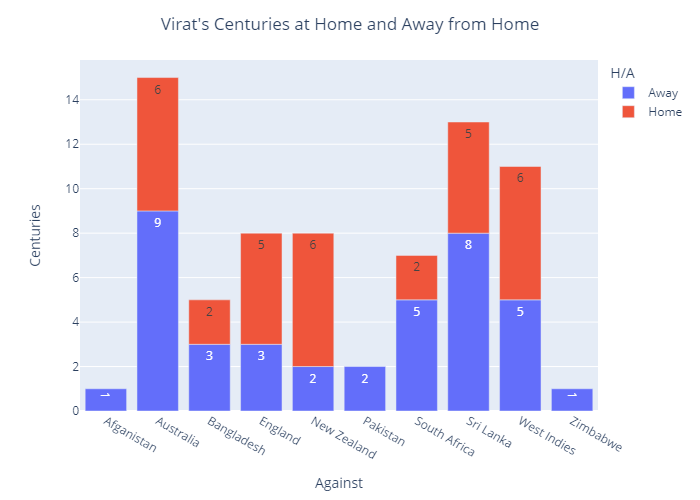

In [221]:
H_a = df.groupby(['Against','H/A'])['Score'].count().reset_index().rename(columns={'Score':'Centuries'})
fig = px.bar(data_frame=H_a,x='Against',y='Centuries',color='H/A',text_auto=True)
fig.update_layout(title = "Virat's Centuries at Home and Away from Home", title_x=0.5)
pio.renderers.default = "notebook_connected"
fig.show("png")

#### Best batting order with respective format and batting order vs score

<AxesSubplot:xlabel='Batting Order', ylabel='Score'>

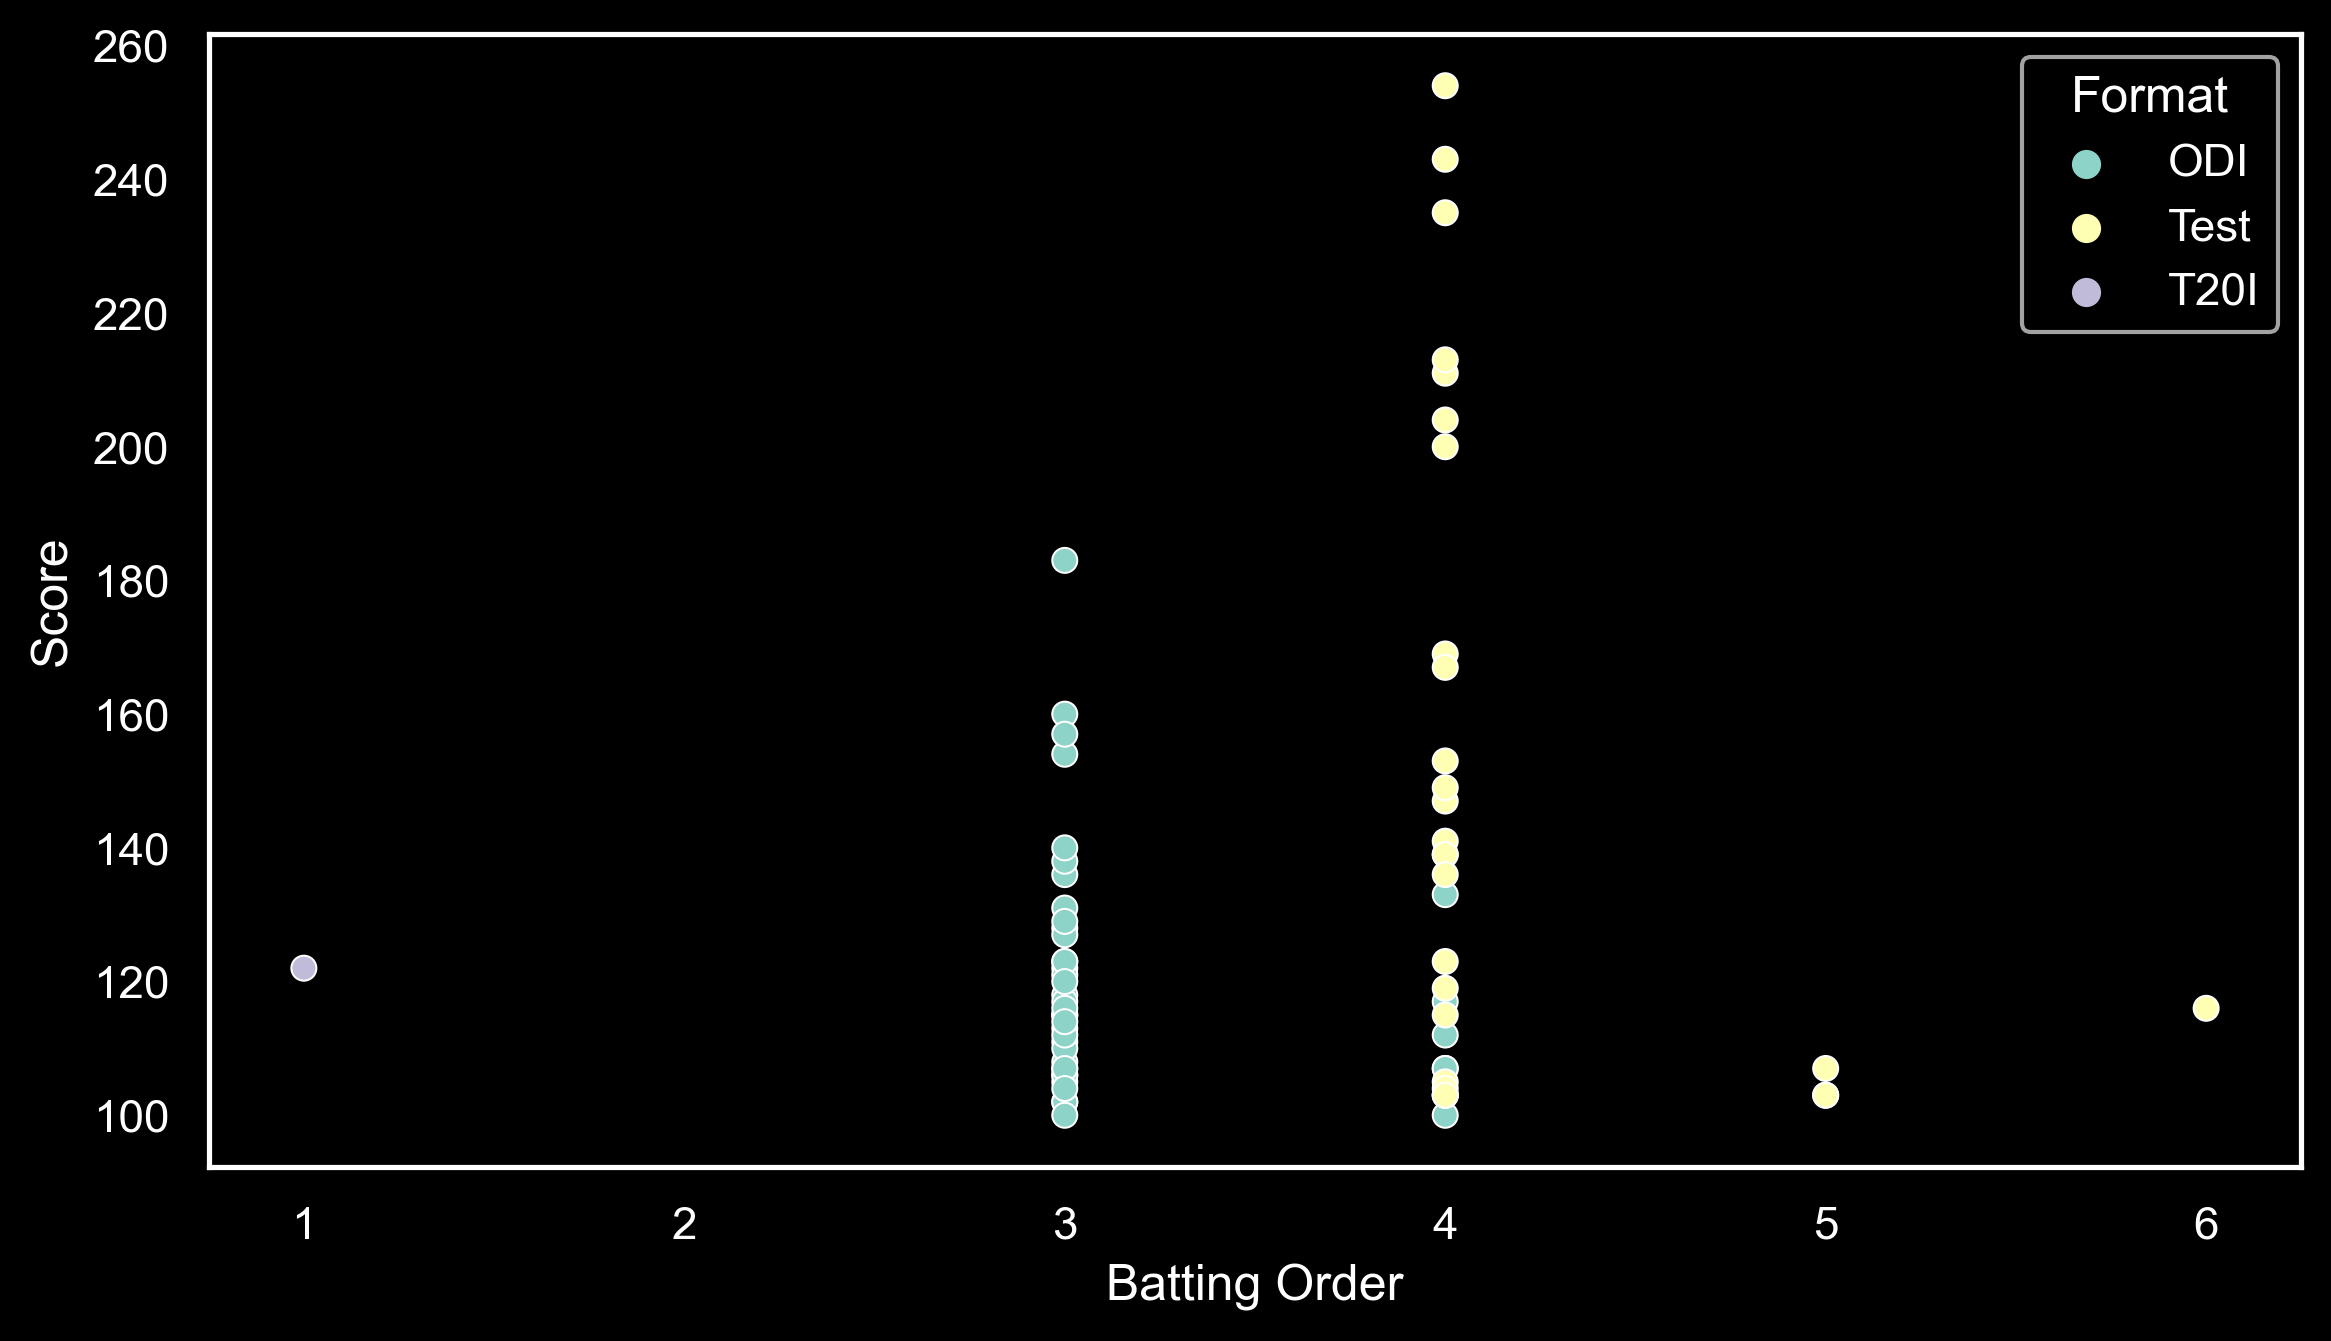

In [201]:
plt.figure(dpi=300,figsize=(9,5))
sns.scatterplot(x='Batting Order',y='Score',data=df,hue='Format')

#### Why virat called as chase master ? 

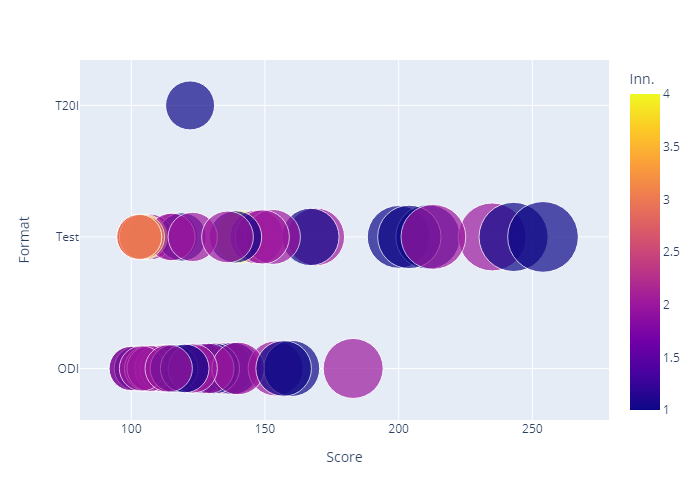

In [222]:
fig = px.scatter(df, x="Score", y="Format", size="Score", color="Inn.",
           hover_name="Result", size_max=50)
pio.renderers.default = "notebook_connected"
fig.show("png")

#### Virat Kohli's Centuries in terms of format

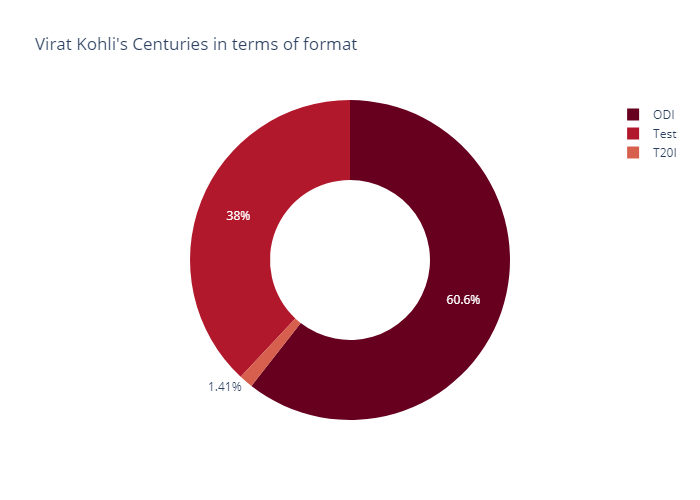

In [223]:
fig = px.pie(values = df.Format.value_counts().values,names=df.Format.value_counts().index,hole=0.5,
       title="Virat Kohli's Centuries in terms of format",color_discrete_sequence=px.colors.sequential.RdBu)
pio.renderers.default = "notebook_connected"
fig.show("png")

#### Virat Kohli's Centuries in terms of format wrt teams

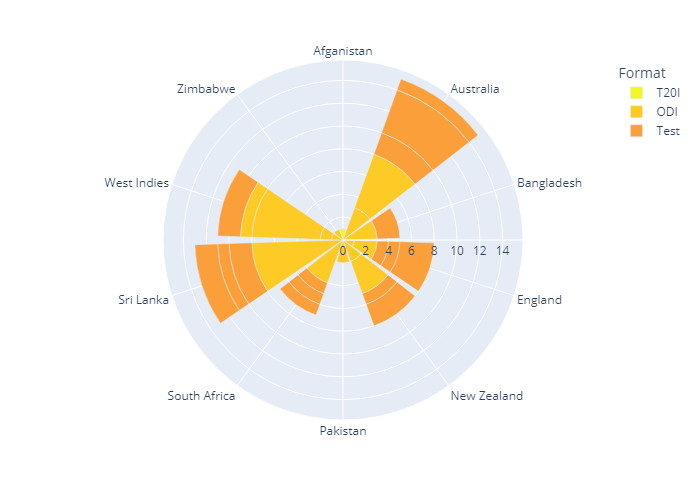

In [224]:
data = df.groupby(['Against','Format','Result'])['Score'].count().reset_index().rename(columns ={'Score':'Number_of_Centuries'})
fig = px.bar_polar(data, r="Number_of_Centuries", theta="Against", color="Format",
            color_discrete_sequence= px.colors.sequential.Plasma_r)
pio.renderers.default = "notebook_connected"
fig.show("png")

#### Winning and Losing of India in all three Formats w.r.t Virat's Century and format

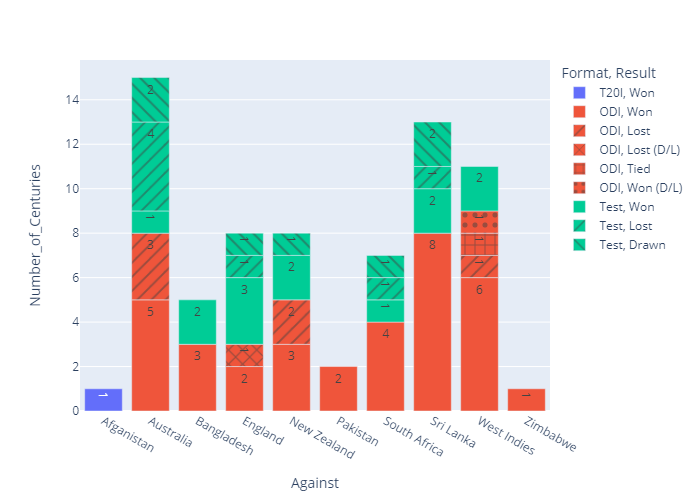

In [225]:
data = df.groupby(['Against','Format','Result'])['Score'].count().reset_index().rename(columns ={'Score':'Number_of_Centuries'})
fig = px.bar(data_frame=data,x='Against',y='Number_of_Centuries',color ='Format',text_auto=True,pattern_shape='Result')
pio.renderers.default = "notebook_connected"
fig.show("png")

In [206]:
ton_win = df.groupby(['Result','Format'])['Score'].count().reset_index()

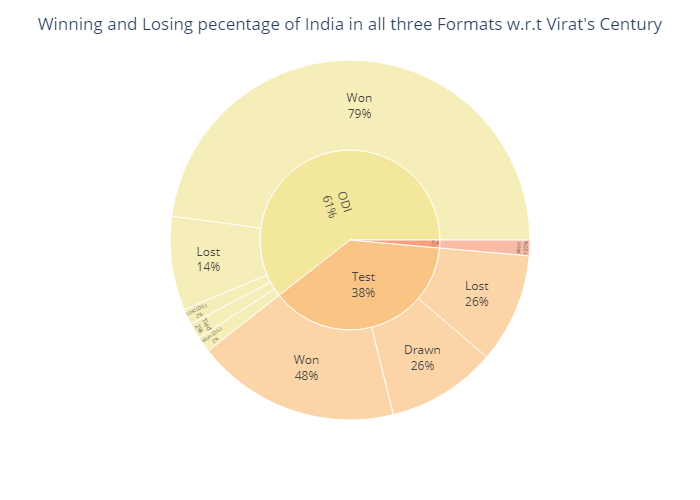

In [226]:
fig = px.sunburst(ton_win,path=['Format','Result'],values='Score',color_discrete_sequence= px.colors.sequential.Sunset)
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title="Winning and Losing pecentage of India in all three Formats w.r.t Virat's Century",title_x=0.5)
pio.renderers.default = "notebook_connected"
fig.show("png")

In [208]:
df_results_against = df.groupby(['Format','Result','Against'])['Score'].count().reset_index()

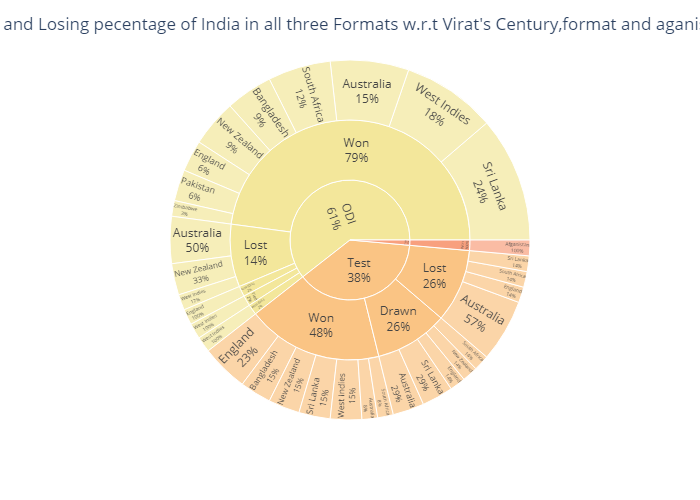

In [227]:
fig = px.sunburst(df_results_against,path=['Format','Result','Against'],values='Score',color_discrete_sequence= px.colors.sequential.Sunset)
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title="Winning and Losing pecentage of India in all three Formats w.r.t Virat's Century,format and aganist teams",title_x=0.5)
pio.renderers.default = "notebook_connected"
fig.show("png")

#### Virat as captain

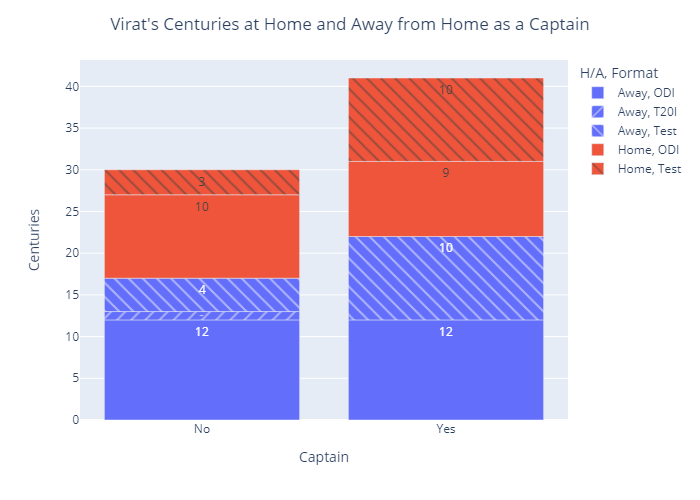

In [228]:
H_a = df.groupby(['Captain','Format','H/A'])['Score'].count().reset_index().rename(columns={'Score':'Centuries'})
fig = px.bar(data_frame=H_a,x='Captain',y='Centuries',color='H/A',pattern_shape='Format',text_auto=True,)
fig.update_layout(title = "Virat's Centuries at Home and Away from Home as a Captain", title_x=0.5)
pio.renderers.default = "notebook_connected"
fig.show("png")

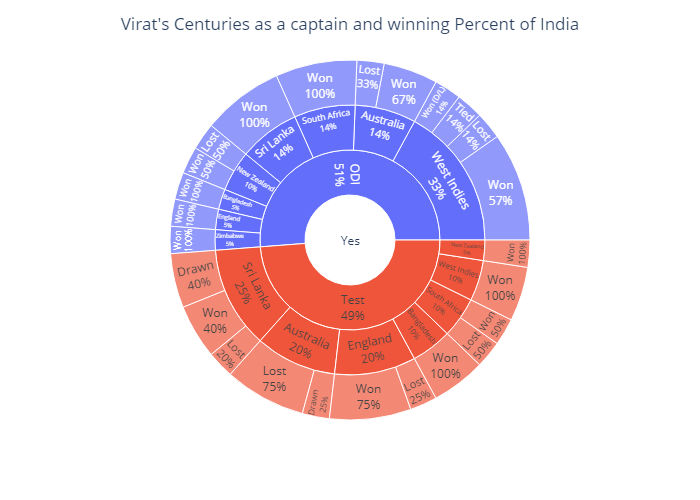

In [229]:
ton_cap = df[df['Captain']=='Yes'].groupby(['Captain','Format','Against','Result'])['Score'].count().reset_index()
fig = px.sunburst(ton_cap,path=['Captain','Format','Against','Result'],values='Score')
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title="Virat's Centuries as a captain and winning Percent of India",title_x=0.5)
pio.renderers.default = "notebook_connected"
fig.show("png")

#### No of times virat awarded Man of the Match when he scored century wrt format

In [212]:
mom_cen = df.groupby(['Format','Man of the Match'])['Score'].count().reset_index()

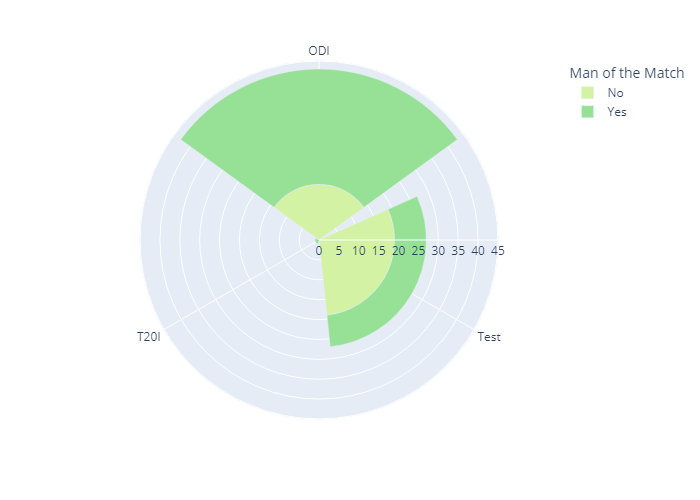

<Figure size 4500x2500 with 0 Axes>

In [230]:
plt.figure(dpi=500,figsize=(9,5))
fig = px.bar_polar(mom_cen, r="Score", theta="Format", color="Man of the Match",
            color_discrete_sequence= px.colors.sequential.Emrld)
pio.renderers.default = "notebook_connected"
fig.show("png")